In [10]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [46]:
d = datetime(4,12,26);
print d.date

                
    
ms = gps_particle_data.meta_search();

e = gps_particle_data.event("Boxing Day Earthquake");
e.add_date(mins=59,hh=00,dd=26,mm=12,yy=04);
e.add_data("Geographic_Latitude",3.24);
e.add_data("Geographic_Longitude",95.8);

start_date = datetime(04,12,19);
end_date = datetime(05,1,1);

ms.load_data(start_date,end_date);
ms.apply_search(e);
ms.extend_time_window(2);

output_data = ms.get_selected_data("decimal_day");

#for fn in output_data.keys():
#    print;#
#    print;
#    print fn;
#    for ikey in output_data[fn].keys():
#       print ikey;
#       print output_data[fn][ikey][0];
#       print output_data[fn][ikey][-1];



<built-in method date of datetime.datetime object at 0x7f697ceeacb0>
File ns41_041219_v1.03.ascii already exists 

Reading file ns41_041219_v1.03.ascii

Min Latitude         :  -56.1881
Max Latitude         :  56.1904
Min Longitude         :  -179.9404
Max Longitude         :  177.8825
Min Radius         :  4.161329
Max Radius         :  4.176166
Min L Shell         :  4.118633
Max L Shell        :  25.0
Min Day            :  354.000683
Max Day            :  360.997905
Year             :  2004.0

File ns41_041226_v1.03.ascii already exists 

Reading file ns41_041226_v1.03.ascii

Min Latitude         :  -179.2694
Max Latitude         :  178.2377
Min Longitude         :  -179.5841
Max Longitude         :  178.1846
Min Radius         :  1.3833
Max Radius         :  7185.471
Min L Shell         :  1.959381
Max L Shell        :  25.0
Min Day            :  361.000683
Max Day            :  -31.9926
Year             :  2004.0

File ns41_050102_v1.03.ascii already exists 

Reading file ns41_050

361.040972222


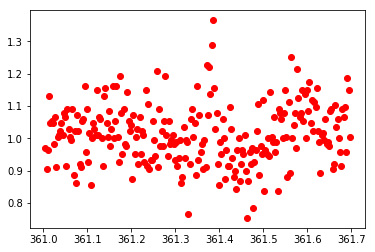

In [52]:
# plot some of the data
x =  output_data["ns61_041226"]["decimal_day"][:]
tmp = output_data["ns61_041226"]["rate_proton_measured"][:];
tmpb = output_data["ns61_041226"]["proton_background"][:];
y = list();
for i,it in enumerate(tmp):
    b = tmpb[i];
    y.append(it[2]/b[2]);
plt.plot(x[0:250],y[0:250],'ro')
# plt.plot(output_data[0]["decimal_day"][:],output_data[0]["rate_proton_measured"][:],'ro-');
print e.data["decimal_day"];